## Imports

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
ds = pd.read_csv('mnist_test.csv')

In [3]:
ds.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

In [4]:
X = ds.iloc[:,1:].values

In [5]:
Y = ds.iloc[:,0].values

In [6]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

In [7]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')

In [8]:
Y.shape

(10000,)

In [9]:
Y = ct.fit_transform(Y.reshape(len(Y),1))

In [10]:
Y = Y[:,:].toarray()

In [11]:
Y[:1,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [12]:
from sklearn.decomposition import PCA

### For 2D graph

In [13]:
pca  = PCA(n_components = 2)

In [14]:
X_pca = pca.fit_transform(X)

### For 3D graph

In [16]:
pca2 = PCA(n_components=3)
X_pca2 = pca2.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split as tts

In [18]:
Xtrain, Xtest, Ytrain,Ytest,X_pcatrain,X_pcatest,X_pca2train,X_pca2test = tts(X,Y,X_pca,X_pca2,test_size=0.2)

## Decision Tree Classification

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
classifierDTC = DecisionTreeClassifier(criterion='entropy')

In [21]:
classifierDTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy')

In [22]:
Ypred = classifierDTC.predict(Xtest)

In [23]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [24]:
print(f'accuracy score: {accuracy_score(Ytest,Ypred)}')
print(classification_report(Ytest,Ypred))

accuracy score: 0.8185
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       217
           1       0.92      0.97      0.94       190
           2       0.82      0.79      0.81       224
           3       0.83      0.78      0.80       215
           4       0.71      0.79      0.75       196
           5       0.79      0.78      0.78       172
           6       0.84      0.77      0.81       196
           7       0.89      0.87      0.88       212
           8       0.66      0.72      0.69       176
           9       0.77      0.78      0.77       202

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000
 samples avg       0.82      0.82      0.82      2000



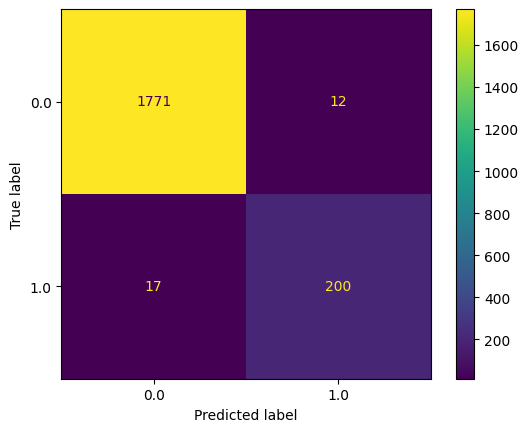

In [25]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,0],Ypred[:,0])

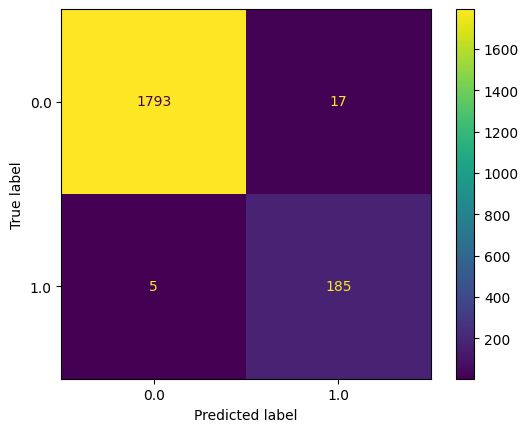

In [26]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,1],Ypred[:,1])

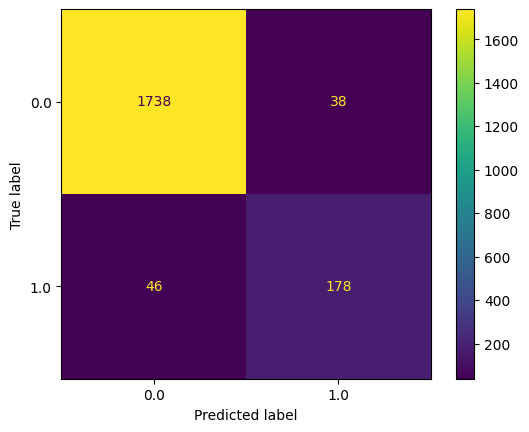

In [27]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,2],Ypred[:,2])

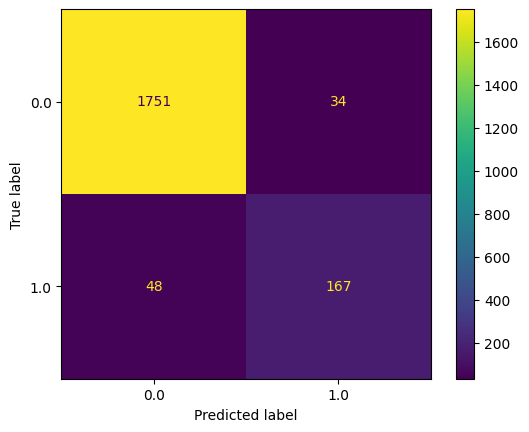

In [28]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,3],Ypred[:,3])

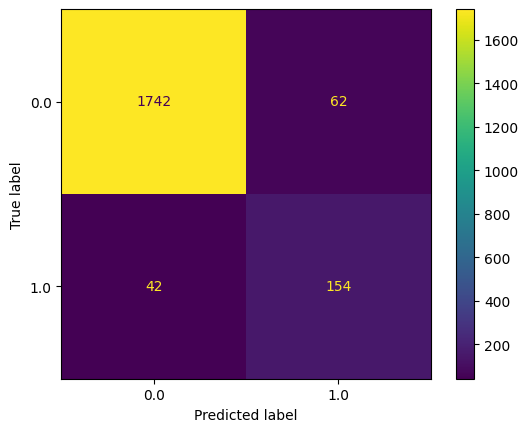

In [29]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,4],Ypred[:,4])

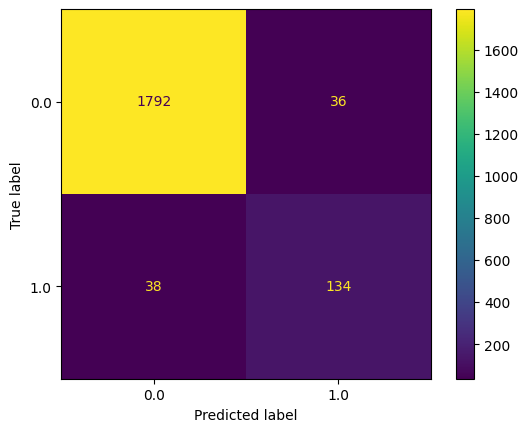

In [30]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,5],Ypred[:,5])

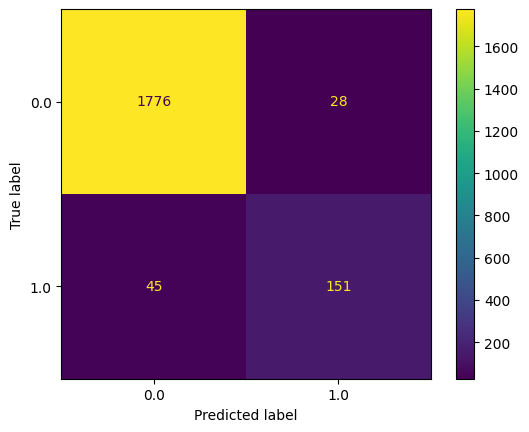

In [31]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,6],Ypred[:,6])

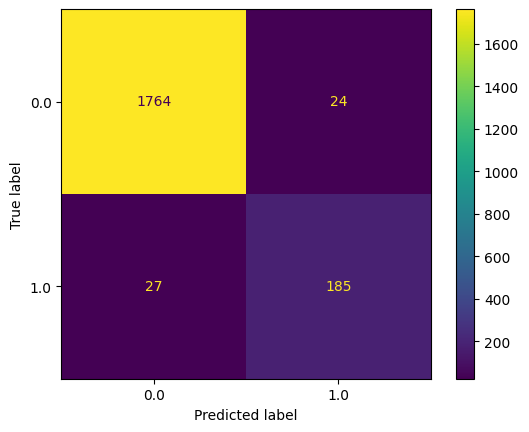

In [32]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,7],Ypred[:,7])

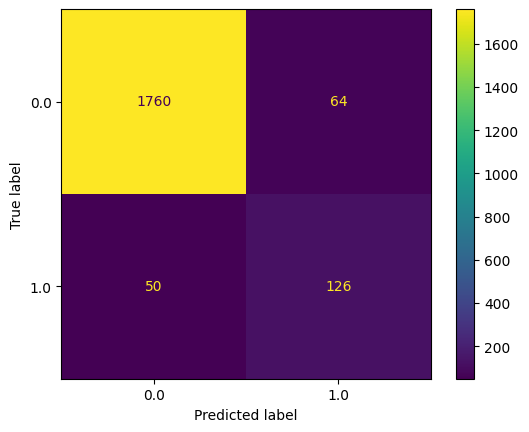

In [33]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,8],Ypred[:,8])

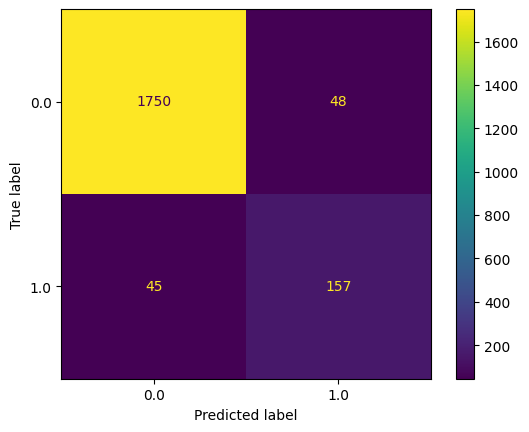

In [34]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,9],Ypred[:,9])

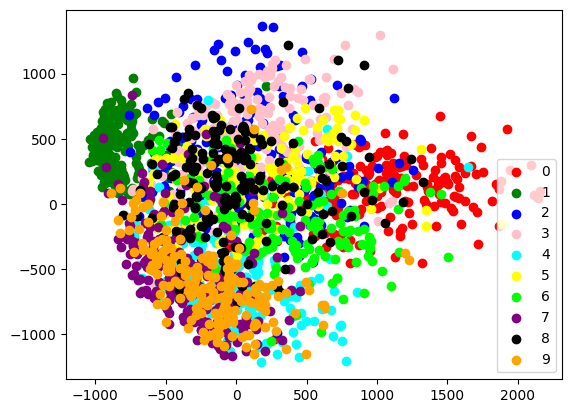

In [35]:
plt.scatter(X_pcatest[Ypred[:,0]==1,0],X_pcatest[Ypred[:,0]==1,1],color='red',label='0')
plt.scatter(X_pcatest[Ypred[:,1]==1,0],X_pcatest[Ypred[:,1]==1,1],color='green',label='1')
plt.scatter(X_pcatest[Ypred[:,2]==1,0],X_pcatest[Ypred[:,2]==1,1],color='blue',label='2')
plt.scatter(X_pcatest[Ypred[:,3]==1,0],X_pcatest[Ypred[:,3]==1,1],color='pink',label='3')
plt.scatter(X_pcatest[Ypred[:,4]==1,0],X_pcatest[Ypred[:,4]==1,1],color='cyan',label='4')
plt.scatter(X_pcatest[Ypred[:,5]==1,0],X_pcatest[Ypred[:,5]==1,1],color='yellow',label='5')
plt.scatter(X_pcatest[Ypred[:,6]==1,0],X_pcatest[Ypred[:,6]==1,1],color='lime',label='6')
plt.scatter(X_pcatest[Ypred[:,7]==1,0],X_pcatest[Ypred[:,7]==1,1],color='purple',label='7')
plt.scatter(X_pcatest[Ypred[:,8]==1,0],X_pcatest[Ypred[:,8]==1,1],color='black',label='8')
plt.scatter(X_pcatest[Ypred[:,9]==1,0],X_pcatest[Ypred[:,9]==1,1],color='orange',label='9')
plt.legend()

## Random Forest Classification

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
classifierRFC = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42)

In [38]:
classifierRFC.fit(Xtrain,Ytrain)

RandomForestClassifier(criterion='entropy', random_state=42)

In [39]:
Ypred = classifierRFC.predict(Xtest)

In [64]:
print(f'accuracy score: {accuracy_score(Ytest,Ypred)}')
print(classification_report(Ytest,Ypred,zero_division=1))

accuracy score: 0.8315
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       217
           1       1.00      0.99      1.00       190
           2       0.99      0.81      0.89       224
           3       0.99      0.75      0.85       215
           4       0.99      0.80      0.88       196
           5       1.00      0.75      0.86       172
           6       1.00      0.86      0.93       196
           7       0.99      0.88      0.94       212
           8       1.00      0.69      0.82       176
           9       0.97      0.84      0.90       202

   micro avg       0.99      0.83      0.91      2000
   macro avg       0.99      0.83      0.90      2000
weighted avg       0.99      0.83      0.90      2000
 samples avg       0.99      0.83      0.83      2000



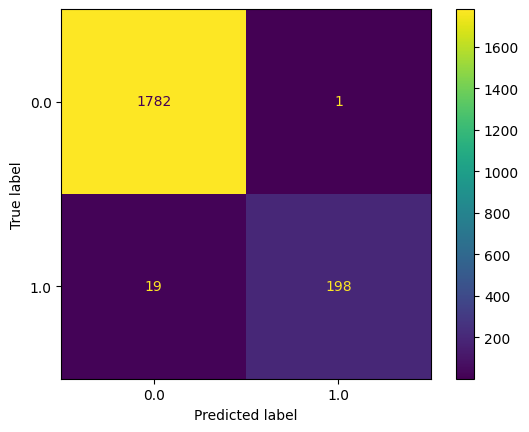

In [41]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,0],Ypred[:,0])

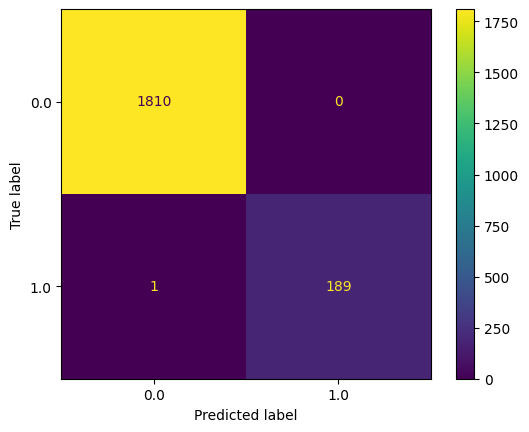

In [42]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,1],Ypred[:,1])

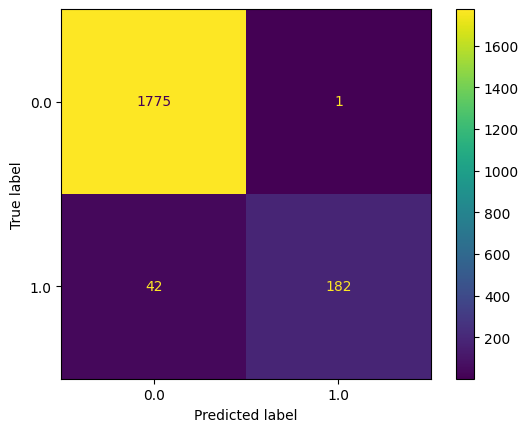

In [43]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,2],Ypred[:,2])

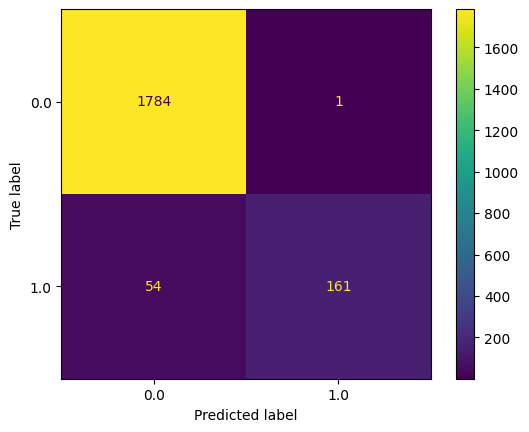

In [44]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,3],Ypred[:,3])

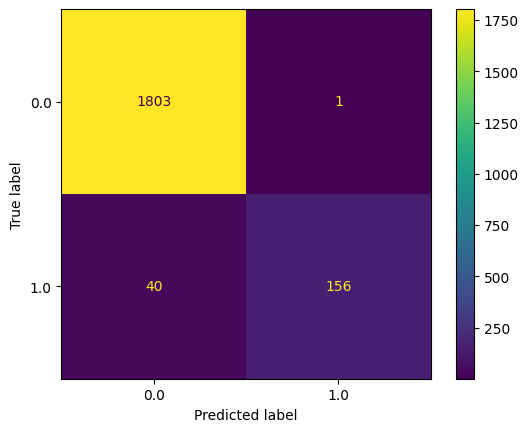

In [45]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,4],Ypred[:,4])

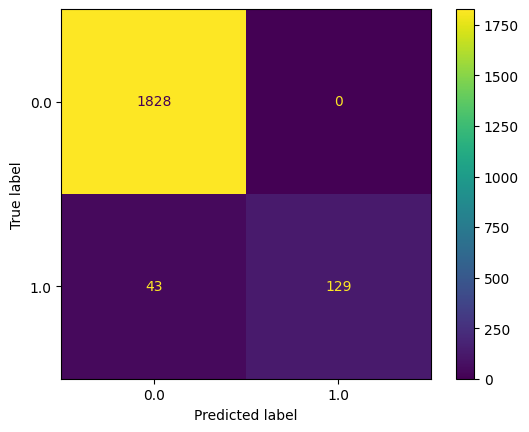

In [46]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,5],Ypred[:,5])

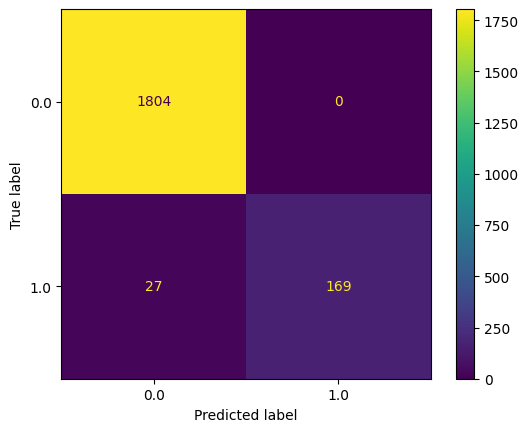

In [47]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,6],Ypred[:,6])

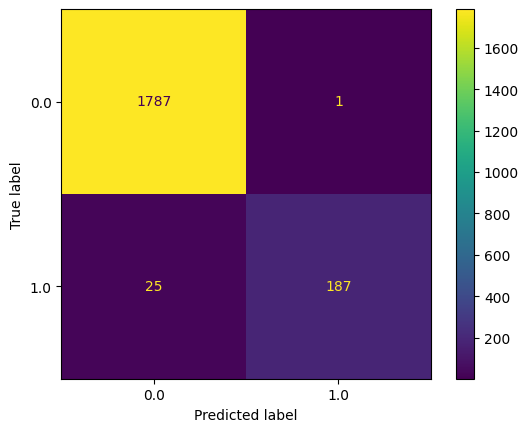

In [48]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,7],Ypred[:,7])

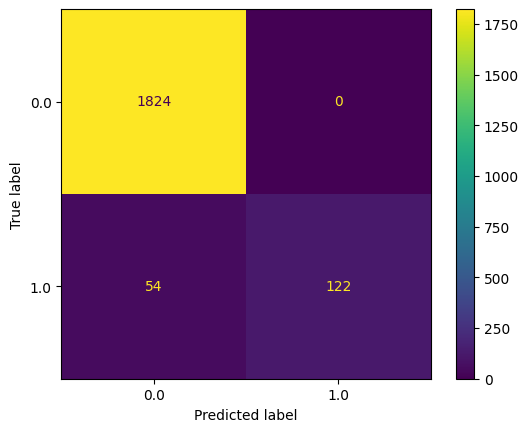

In [49]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,8],Ypred[:,8])

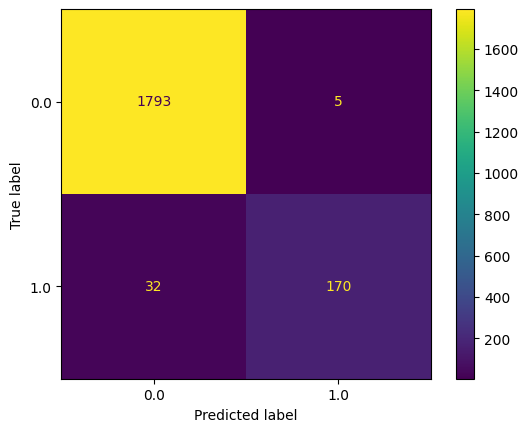

In [50]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,9],Ypred[:,9])

## Making Graphs Just for practice

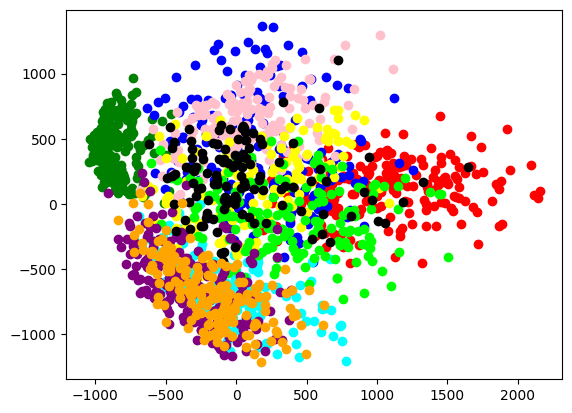

In [51]:
plt.scatter(X_pcatest[Ypred[:,0]==1,0],X_pcatest[Ypred[:,0]==1,1],color='red')
plt.scatter(X_pcatest[Ypred[:,1]==1,0],X_pcatest[Ypred[:,1]==1,1],color='green')
plt.scatter(X_pcatest[Ypred[:,2]==1,0],X_pcatest[Ypred[:,2]==1,1],color='blue')
plt.scatter(X_pcatest[Ypred[:,3]==1,0],X_pcatest[Ypred[:,3]==1,1],color='pink')
plt.scatter(X_pcatest[Ypred[:,4]==1,0],X_pcatest[Ypred[:,4]==1,1],color='cyan')
plt.scatter(X_pcatest[Ypred[:,5]==1,0],X_pcatest[Ypred[:,5]==1,1],color='yellow')
plt.scatter(X_pcatest[Ypred[:,6]==1,0],X_pcatest[Ypred[:,6]==1,1],color='lime')
plt.scatter(X_pcatest[Ypred[:,7]==1,0],X_pcatest[Ypred[:,7]==1,1],color='purple')
plt.scatter(X_pcatest[Ypred[:,8]==1,0],X_pcatest[Ypred[:,8]==1,1],color='black')
plt.scatter(X_pcatest[Ypred[:,9]==1,0],X_pcatest[Ypred[:,9]==1,1],color='orange')

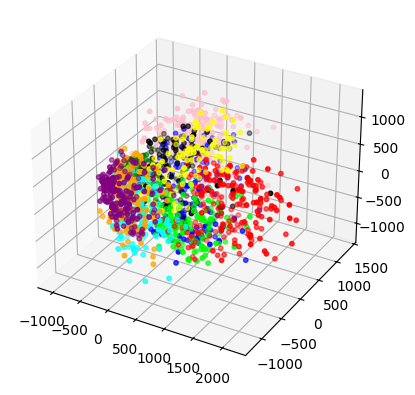

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sizes = np.linspace(1, 1,1)
ax.scatter(X_pca2test[Ypred[:,0]==1,0],X_pca2test[Ypred[:,0]==1,1],X_pca2test[Ypred[:,0]==1,2],color='red',marker='o',s=10)
ax.scatter(X_pca2test[Ypred[:,1]==1,0],X_pca2test[Ypred[:,1]==1,1],X_pca2test[Ypred[:,1]==1,2],color='green',marker='o',s=10)
ax.scatter(X_pca2test[Ypred[:,2]==1,0],X_pca2test[Ypred[:,2]==1,1],X_pca2test[Ypred[:,2]==1,2],color='blue',marker='o',s=10)
ax.scatter(X_pca2test[Ypred[:,3]==1,0],X_pca2test[Ypred[:,3]==1,1],X_pca2test[Ypred[:,3]==1,2],color='pink',marker='o',s=10)
ax.scatter(X_pca2test[Ypred[:,4]==1,0],X_pca2test[Ypred[:,4]==1,1],X_pca2test[Ypred[:,4]==1,2],color='cyan',marker='o',s=10)
ax.scatter(X_pca2test[Ypred[:,5]==1,0],X_pca2test[Ypred[:,5]==1,1],X_pca2test[Ypred[:,5]==1,2],color='yellow',marker='o',s=10)
ax.scatter(X_pca2test[Ypred[:,6]==1,0],X_pca2test[Ypred[:,6]==1,1],X_pca2test[Ypred[:,6]==1,2],color='lime',marker='o',s=10)
ax.scatter(X_pca2test[Ypred[:,7]==1,0],X_pca2test[Ypred[:,7]==1,1],X_pca2test[Ypred[:,7]==1,2],color='purple',marker='o',s=10)
ax.scatter(X_pca2test[Ypred[:,8]==1,0],X_pca2test[Ypred[:,8]==1,1],X_pca2test[Ypred[:,8]==1,2],color='black',marker='o',s=10)
ax.scatter(X_pca2test[Ypred[:,9]==1,0],X_pca2test[Ypred[:,9]==1,1],X_pca2test[Ypred[:,9]==1,2],color='orange',marker='o',s=10)